# Sketch de esquema de predicción de variables climáticas

Adquisición de los datos.

In [35]:
%matplotlib inline

import pandas as pd
import numpy as np
from sklearn import preprocessing

# VAR example
from statsmodels.tsa.vector_ar.var_model import VAR
from random import random

# adquisición de data
csvname = 'Azapa.csv'
df = pd.read_csv(csvname,decimal=",",skiprows=5,usecols=[1,2,3,4])
#data = pd.Series(df)

data=np.asarray(df[df.columns[1:4]],dtype='float') 
# columnas 1:4 contienen valores de Temperatura (°C), Humedad Relativa (%), Velocidad de viento (Km/h)
times=np.asarray(df[df.columns[0]])

escalamiento de los datos

In [36]:
scaler = preprocessing.StandardScaler()
data_sc = scaler.fit_transform(data)
#data_sc = pd.DataFrame(scaled_df, columns=['temp', 'hum', 'vv'])

entrenamiento

In [37]:
# contrived dataset with dependency

ii1 = 1; ii2 = round(len(data)*0.7)
ii3 = round(len(data)*0.7); ii4 = len(data)
totrain = data_sc[ii1:ii2,:]
totest = data_sc[ii3:ii4,:]
model = VAR(totrain)
model_fit = model.fit(maxlags=24)

predicción

In [38]:
steps_to_predict = 24
yhat = model_fit.forecast(model_fit.y, steps=steps_to_predict)

#se reescalan los valores predecidos a la escala de los datos originales
yhat_unsc = scaler.inverse_transform(yhat)

reporte de datos

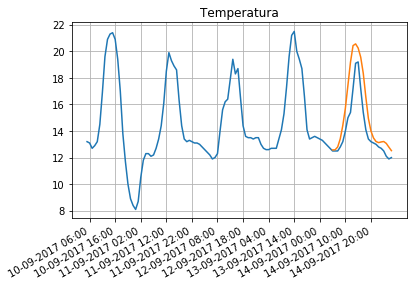

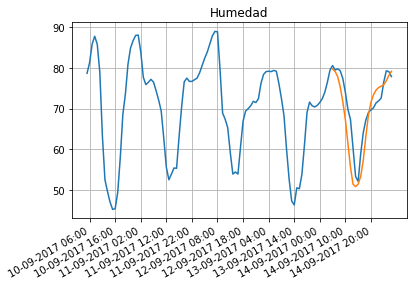

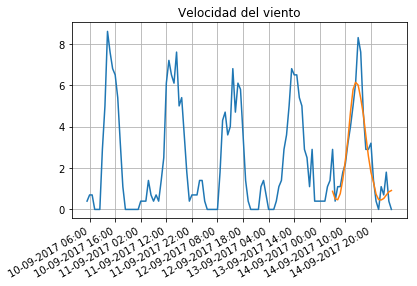

In [40]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(times[ii2-96:ii2+steps_to_predict] ,data[ii2-96:ii2+steps_to_predict,0] )
plt.plot(times[ii2:ii2+steps_to_predict],yhat_unsc[:,0])
plt.gcf().autofmt_xdate()
plt.title('Temperatura')
plt.xticks(np.arange(1, 96+steps_to_predict, step=10))
plt.grid()
plt.savefig('pred_temp.png')

plt.figure()
plt.plot(times[ii2-96:ii2+steps_to_predict] ,data[ii2-96:ii2+steps_to_predict,1] )
plt.gcf().autofmt_xdate()
plt.plot(times[ii2:ii2+steps_to_predict],yhat_unsc[:,1])
plt.title('Humedad')
plt.xticks(np.arange(1, 96+steps_to_predict, step=10))
plt.grid()
plt.savefig('pred_hum.png')

plt.figure()
plt.plot(times[ii2-96:ii2+steps_to_predict] ,data[ii2-96:ii2+steps_to_predict,2] )
plt.gcf().autofmt_xdate()
plt.plot(times[ii2:ii2+steps_to_predict],yhat_unsc[:,2])
plt.title('Velocidad del viento')
plt.xticks(np.arange(1, 96+steps_to_predict, step=10))
plt.grid()
plt.savefig('vv.png')

